In [1]:

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [3]:
x_test.shape

(10000, 32, 32, 3)

we have 50000 training images and 1000 test images

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)


y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [6]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck']

polt some images

In [9]:
def plot_images(x, y, index):
    plt.figure(figsize=(5, 3))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

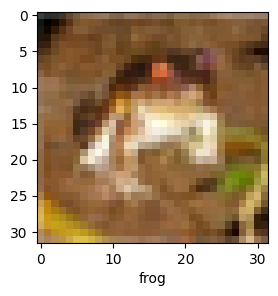

In [10]:
plot_images(x_train, y_train, 0)

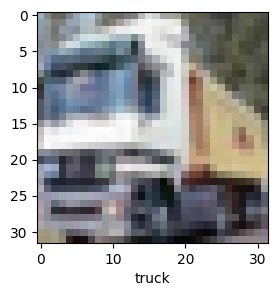

In [11]:
plot_images(x_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255



Normalizing the training data

In [12]:
x_train=x_train/255.0
x_test=x_test/255.0

Build simple artificial neural network for image classification

In [13]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),   
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

ann.fit(x_train,y_train, epochs=5)

c:\Users\SUBHRADIP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.3020 - loss: 1.9376
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.4209 - loss: 1.6428
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.4513 - loss: 1.5517
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 49ms/step - accuracy: 0.4781 - loss: 1.4870
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 94s 60ms/step - accuracy: 0.4968 - loss: 1.4382


In [14]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.43      0.52      1000
           1       0.70      0.49      0.58      1000
           2       0.32      0.46      0.38      1000
           3       0.38      0.31      0.34      1000
           4       0.42      0.39      0.41      1000
           5       0.36      0.43      0.39      1000
           6       0.51      0.58      0.54      1000
           7       0.61      0.50      0.55      1000
           8       0.53      0.73      0.61      1000
           9       0.57      0.54      0.55      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.49     10000
weighted avg       0.50      0.49      0.49     10000




Now let us build a convolutional neural network to train our images

In [15]:
cnn=models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

c:\Users\SUBHRADIP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])    
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 0.3690 - loss: 1.7287
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5898 - loss: 1.1689
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.6420 - loss: 1.0213
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.6726 - loss: 0.9356
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 27ms/step - accuracy: 0.7011 - loss: 0.8650
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.7170 - loss: 0.8117
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 26ms/step - accuracy: 0.7409 - loss: 0.7424
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.7527 - loss: 0.7124
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.7683 - loss: 0.6697
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.7834 - loss: 0.6261


In [17]:
cnn.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6948 - loss: 0.9289


[0.9394675493240356, 0.6919999718666077]

In [18]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


array([[8.18523485e-03, 3.45223234e-05, 2.51137302e-03, 9.30809498e-01,
        9.49324458e-05, 3.77305597e-02, 1.98191479e-02, 6.08937853e-07,
        8.08419718e-04, 5.76165985e-06],
       [8.83337390e-03, 2.47643635e-01, 5.60857479e-05, 5.77101582e-06,
        1.11017050e-06, 8.50752144e-08, 1.80345887e-05, 1.49350953e-07,
        7.43384778e-01, 5.69721196e-05],
       [1.93865523e-02, 5.97084999e-01, 6.06889278e-03, 6.16085250e-03,
        8.74465797e-04, 5.80566702e-04, 5.63581008e-03, 1.92615887e-04,
        3.54855567e-01, 9.15965624e-03],
       [7.60144591e-01, 1.32658305e-02, 1.10407092e-01, 1.52899185e-04,
        2.79880874e-03, 1.64637531e-05, 8.54808372e-03, 6.78576271e-06,
        1.04538642e-01, 1.20811324e-04],
       [6.20558649e-06, 3.37586312e-06, 1.73893087e-02, 1.28802620e-02,
        7.32565671e-02, 1.34147343e-03, 8.95120680e-01, 4.22176697e-07,
        1.64146059e-06, 4.05284410e-08]], dtype=float32)

In [19]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(1), np.int64(0), np.int64(6)]

In [20]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

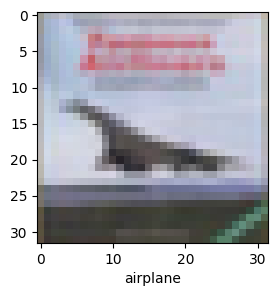

In [21]:
plot_images(x_test, y_test, 3)

In [22]:
classes[y_classes[3]]

'airplane'

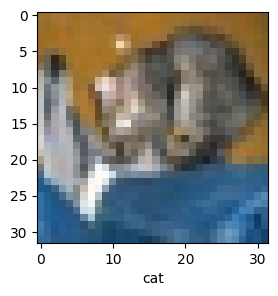

In [23]:
plot_images(x_test, y_test, 0)

In [24]:
classes[y_classes[0]]

'cat'

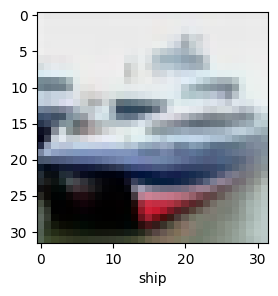

In [25]:
plot_images(x_test, y_test, 1)

In [26]:
classes[y_classes[1]]

'ship'